## Import Libraries

In [33]:
import numpy as np
import pandas as pd
import sys,  datetime, os
import seaborn as sns

In [2]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from collections import Counter

## Load Data

#### Y matrix

In [14]:
Y_raw = pd.read_table('Input/consensus-perts.tsv')
Y_raw.set_index('pert_id', inplace=True)
print(Y_raw.shape)

(13072, 978)


In [15]:
Y_raw.head()

,10007,1001,10013,10038,10046,10049,10051,10057,10058,10059,...,9918,9924,9926,9928,993,994,9943,9961,998,9988
pert_id,,,,,,,,,,,,,,,,,,,,,
BRD-A00100033,-0.065,3.696,-1.701,-0.156,-0.632,0.215,-0.056,-0.741,-1.280,-0.242,...,0.082,0.690,-0.256,-0.290,-0.092,-0.878,-0.949,0.066,0.070,3.351
BRD-A00150179,0.179,1.264,1.399,0.492,-0.337,-0.907,0.441,-0.462,0.011,0.815,...,-1.281,1.165,0.860,-0.505,1.617,1.024,0.230,-0.483,0.880,0.200
BRD-A00267231,-2.384,2.685,0.740,-1.937,-1.680,1.422,-1.537,-0.623,-1.370,1.558,...,0.064,-0.446,-1.440,-2.777,-0.227,-0.677,-0.113,-0.083,-1.780,-0.524
BRD-A00420644,2.187,0.203,-4.654,-2.816,2.550,-0.308,-4.254,3.888,-1.853,0.478,...,-2.109,-1.723,0.087,-3.514,-0.055,-2.989,1.203,-2.633,-0.106,2.473
BRD-A00474148,-0.704,3.315,-0.463,0.713,1.250,0.956,0.030,-0.355,-0.492,-2.037,...,-1.010,-0.195,-0.698,-1.104,0.088,0.185,-0.499,-1.028,0.513,-0.212


## Check distribution of scores

In [31]:
array = []
for i in list(Y_raw.columns):
    for e in list(Y_raw.index):
        array.append(Y_raw.loc[e,i])
array[0]

-0.065

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


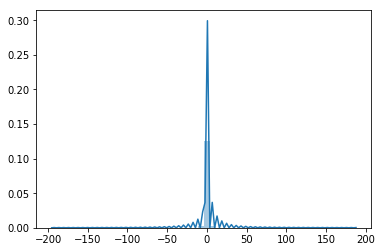

In [34]:
sns.distplot(array)

## Create classifier matrix

In [36]:
# if |score| is greater than 2.33, 0.01 statisically significant to change and new df created with this classification
def changer(x):
    if x >= 2.33:
        return 1.0
    elif x <= -2.33:
        return -1.0
    else:
        return 0.0

In [37]:
Y = pd.DataFrame(0, index = Y_raw.index, columns = Y_raw.columns)

In [40]:
for pert in Y_raw.index:
    for sig in Y_raw.columns:
        Y.loc[pert, sig] = changer(Y_raw.loc[pert,sig])
Y.head()

,10007,1001,10013,10038,10046,10049,10051,10057,10058,10059,...,9918,9924,9926,9928,993,994,9943,9961,998,9988
pert_id,,,,,,,,,,,,,,,,,,,,,
BRD-A00100033,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
BRD-A00150179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BRD-A00267231,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
BRD-A00420644,0.0,0.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0
BRD-A00474148,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Save classification matrix
filename = 'Output/L1000_ClassificationMat_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
Y.to_csv(filename, sep='\t', compression='gzip')